## **Step1:Installing required packages for the programs**


In [ ]:
!git clone https://github.com/leon9869/colab_autoreg.git

Cloning into 'colab_autoreg'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 19 (delta 5), reused 16 (delta 4), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [ ]:
%cd colab_autoreg
!pip install -r requirements.txt

# Step2: find your version of your Chrome
check your version from chrome://settings/help

---



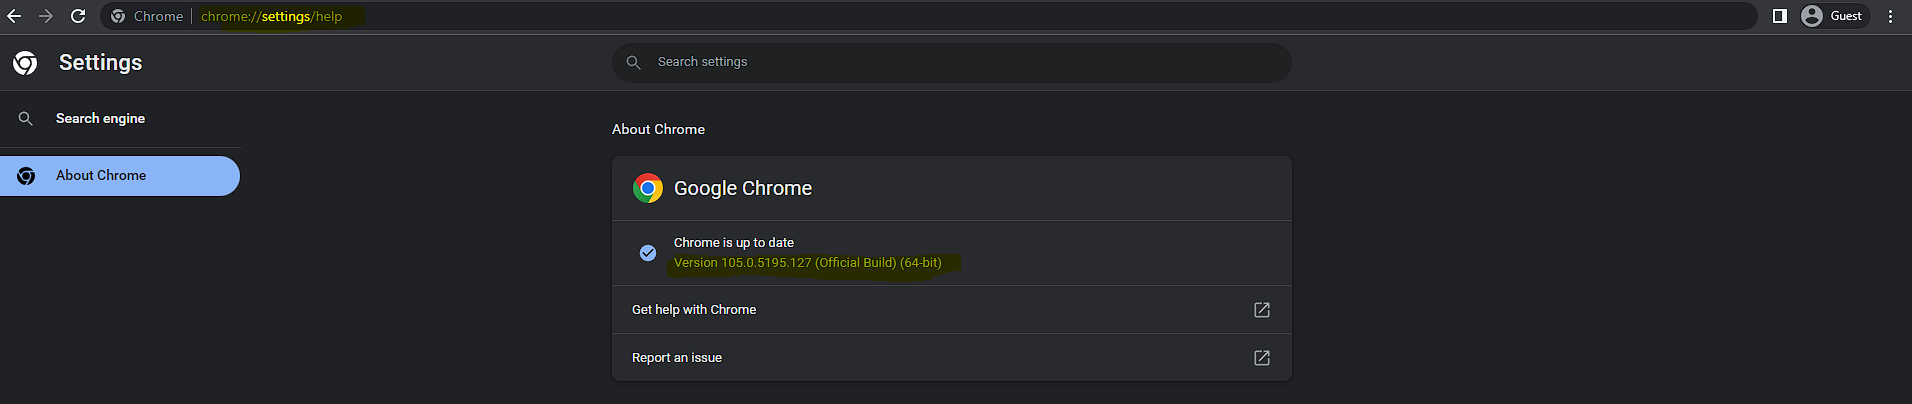

# Step3: Download the chromedriver based on your Chrome verison (i.e. Version 105.0.5195.xxx (Official Build) (64-bit) )
Chrome Driver Download website: https://chromedriver.chromium.org/downloads

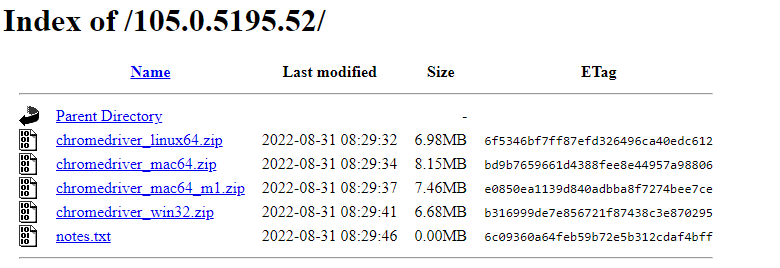

*   Windows: win32.zip
*   mac: mac64.zip
*   m1 mac series: mac64_m1.zip

# Step4: Unzip the file and upload the 'chromedrive.exe' to colab

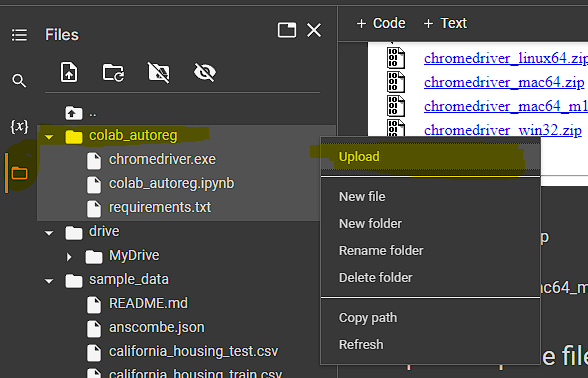

# Step5: Start the following code

In [ ]:
from typing_extensions import runtime
from selenium import webdriver
from datetime import datetime
from apscheduler.schedulers.background import BlockingScheduler
from apscheduler.triggers.date import DateTrigger
import time

from selenium.webdriver.common.by import By

SID = 
PW = 
Choice1 = "12312313"
Choice2 = "2123132"
Choice3 = "1231323"

SID = input("Student Account:")
PW = input("Student Password:")
Choice1 = input("CRN 1:")
Choice2 = input("CRN 2:")
Choice3 = input("CRN 3:")
PATH = "\content\colab_autoreg\chromedriver.exe"
driver = webdriver.Chrome(PATH)

def start_reg():
    sid = SID
    pw = PW
    c1 = Choice1
    c2 = Choice2
    c3 = Choice3
    
    driver.get("https://banner.eduhk.hk/BAN9PRD/twbkwbis.P_GenMenu?name=bmenu.P_MainMnu")

    userid = driver.find_element_by_id("UserID")
    password = driver.find_element_by_name("PIN")

    userid.send_keys(sid)
    password.send_keys(pw)

    driver.find_element_by_css_selector("input[type=\"submit\" i] ").click()

    time.sleep(0.5)

    driver.find_element_by_link_text("Student Services").click()

    driver.find_element_by_link_text("Course Registration").click()

    driver.find_element_by_xpath(
        "/html/body/div[4]/div/table/tbody/tr/td/span/table/tbody/tr/td[2]/table/tbody/tr[14]/td/a").click()

    driver.find_element_by_link_text("Add/Drop Course Groups").click()

    #Submit button
    driver.find_element_by_xpath("/html/body/div[4]/form/input").click()

    CRN1 = driver.find_element_by_id("crn_id1")

    CRN1.send_keys(c1)

    CRN1 = driver.find_element_by_id("crn_id2")

    CRN1.send_keys(c2)

    CRN1 = driver.find_element_by_id("crn_id3")

    CRN1.send_keys(c3)

    #Submit button
    driver.find_element_by_xpath("/html/body/div[4]/form/input[19]").click()
    

    time.sleep(1000)
   
 
reg_datetime = input("Course registration time: DD-MM-YYYY hr:mins")

reg_date_obj = datetime.strptime(reg_datetime,'%d/%m/%Y %H:%M')

print(reg_date_obj)

sched = BlockingScheduler()

exec_time = DateTrigger(run_date = reg_date_obj)
print(datetime.today())

sched.add_job(start_reg,exec_time,id = 'start_reg')

sched.start()

print("Successful")
driver.quit()

KeyboardInterrupt: ignored